**Inspect the Data**
First, let's inspect the dataset to get an overview of its structure. 
This helps us understand its columns, missing values, and any potential issues.

In [1]:
import pandas as pd

url = 'https://raw.githubusercontent.com/KeithGalli/Pandas-Data-Science-Tasks/master/SalesAnalysis/Sales_Data/Sales_April_2019.csv'
df = pd.read_csv(url)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


**Data Preprocessing**

Check and handle missing values (drop or fill them).
Convert date columns to datetime format.
Fix data types to ensure they're appropriate for analysis.

In [12]:
# Basic info
df.info()

# Check for missing values
df.isnull().sum()

# Display some basic statistics for numerical columns
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18383 entries, 0 to 18382
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          18324 non-null  object
 1   Product           18324 non-null  object
 2   Quantity Ordered  18324 non-null  object
 3   Price Each        18324 non-null  object
 4   Order Date        18324 non-null  object
 5   Purchase Address  18324 non-null  object
dtypes: object(6)
memory usage: 861.8+ KB


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,18324,18324,18324,18324,18324,18324
unique,17538,20,8,19,13584,17120
top,Order ID,Lightning Charging Cable,1,14.95,Order Date,Purchase Address
freq,35,2201,16558,2201,35,35


**Data Preprocessing**

Checking for missing values
Handling the missing values by either dropping rows/columns or filling missing values.
Convert date columns
Fix data types by ensuring all columns have appropriate data types for analysis.

In [20]:
# Check for missing values
missing_data = df.isnull().sum()

# Fill missing values only in numeric columns with the mean
numeric_cols = df.select_dtypes(include='number').columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Convert 'Order Date' column to datetime format (assumes format like 04/18/25 14:35)
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%y %H:%M', errors='coerce')

# Check data types after conversion
df.dtypes

Order ID                    object
Product                     object
Quantity Ordered            object
Price Each                  object
Order Date          datetime64[ns]
Purchase Address            object
dtype: object

In [22]:
# Convert numeric columns from object to proper number type
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'], errors='coerce')
df['Price Each'] = pd.to_numeric(df['Price Each'], errors='coerce')

# Optional: Check data types again
df.dtypes

Order ID                    object
Product                     object
Quantity Ordered           float64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
dtype: object

In [24]:
# Calculate total sales per row
df['Total Sales'] = df['Quantity Ordered'] * df['Price Each']

# Preview the result
df[['Quantity Ordered', 'Price Each', 'Total Sales']].head()

,Quantity Ordered,Price Each,Total Sales
0,2.0,11.95,23.90
1,NaN,NaN,NaN
2,1.0,99.99,99.99
3,1.0,600.00,600.00
4,1.0,11.99,11.99


**Exploratory Data Analysis (EDA)**
Now let's proceed with EDA, which is essential to visualize and understand the trends in the dataset.

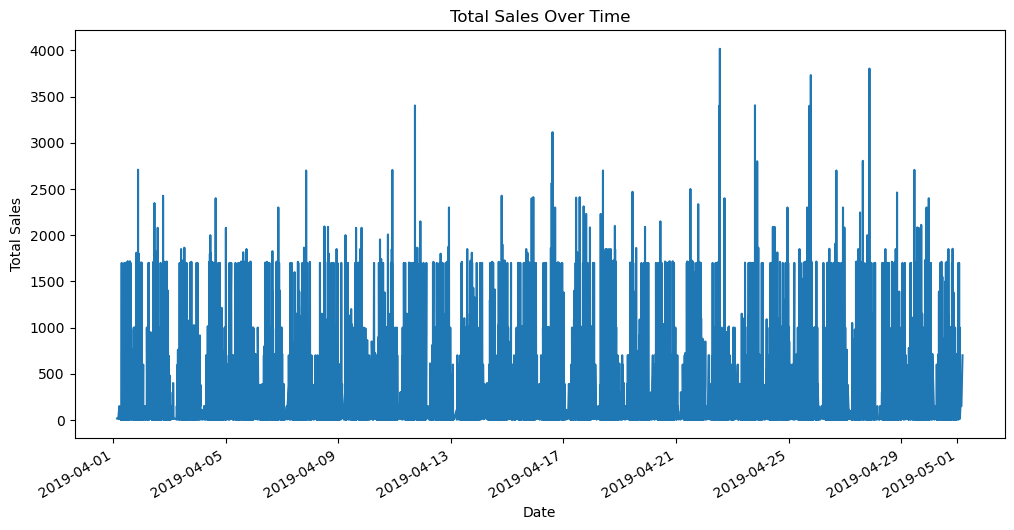

In [27]:
import matplotlib.pyplot as plt

# Group by 'Order Date' and sum the total sales for each date
sales_over_time = df.groupby('Order Date')['Total Sales'].sum()

# Plot the sales over time
plt.figure(figsize=(12, 6))
sales_over_time.plot()
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

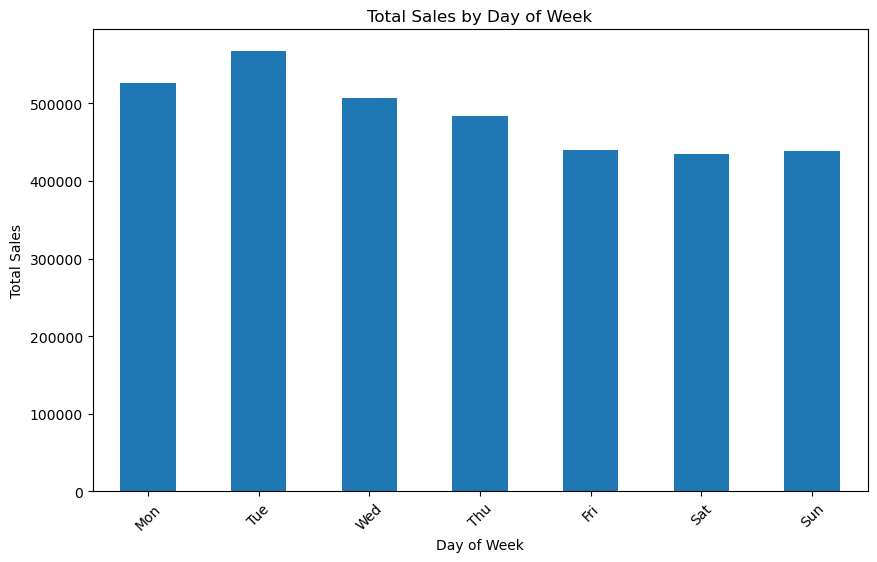

In [29]:
# Group by 'Day of Week' and calculate the total sales for each day
df['Day of Week'] = df['Order Date'].dt.dayofweek  # Monday = 0, Sunday = 6
sales_by_day = df.groupby('Day of Week')['Total Sales'].sum()

# Plot the sales by day of the week
plt.figure(figsize=(10, 6))
sales_by_day.plot(kind='bar')
plt.title('Total Sales by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Total Sales')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=45)
plt.show()

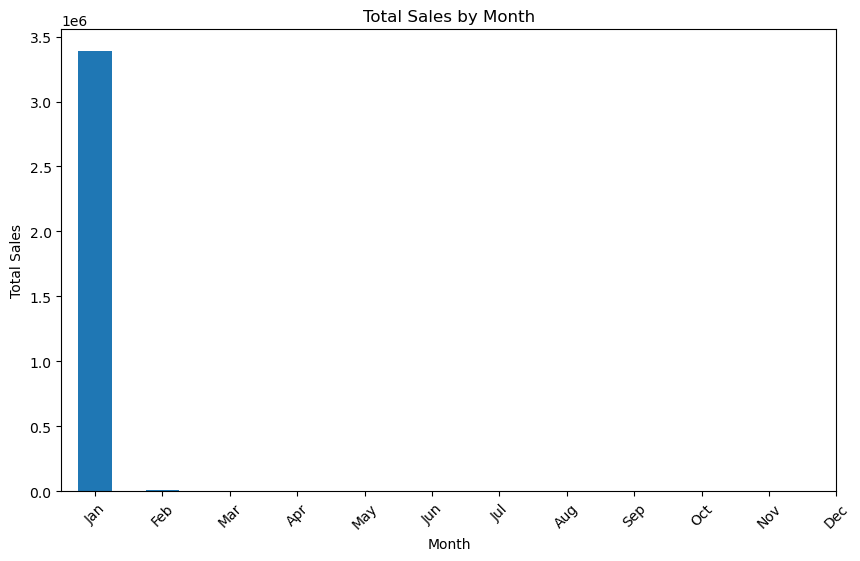

In [31]:
# Extract the month from the 'Order Date'
df['Month'] = df['Order Date'].dt.month

# Group by 'Month' and sum the total sales for each month
sales_by_month = df.groupby('Month')['Total Sales'].sum()

# Plot the sales by month
plt.figure(figsize=(10, 6))
sales_by_month.plot(kind='bar')
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.show()

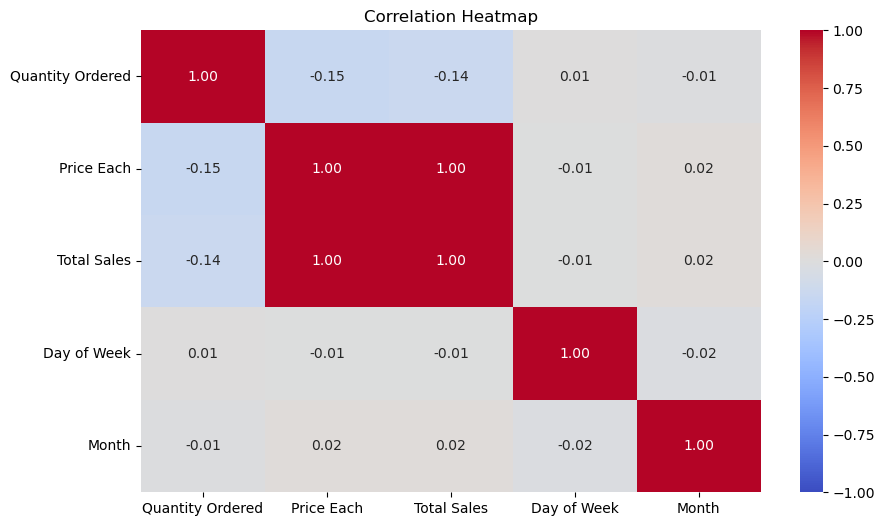

In [35]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Plot a correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

**Feature Engineering**
Extract time-based features: These can be used for more granular analysis, like tracking sales by day of the week, month, or year.
Create a weekend indicator: This feature can help us understand if sales are higher on weekends compared to weekdays.

In [59]:
# Clean up missing data by dropping rows with missing Order Date
df = df.dropna(subset=['Order Date'])

# Extract additional time-based features (do this just once)
df['Day of Week'] = df['Order Date'].dt.dayofweek  # 0=Monday, 6=Sunday
df['Month'] = df['Order Date'].dt.month  # 1=January, 12=December
df['Year'] = df['Order Date'].dt.year  # Year
df['Day'] = df['Order Date'].dt.day  # Day of the month

# Create a weekend indicator (1 for weekend, 0 for weekday)
df['Is Weekend'] = df['Day of Week'].apply(lambda x: 1 if x >= 5 else 0)

# Preview the newly created features (just once)
print(df[['Order Date', 'Day of Week', 'Month', 'Year', 'Day', 'Is Weekend']].head())

           Order Date  Day of Week  Month  Year  Day  Is Weekend
0 2019-04-19 08:46:00            4      4  2019   19           0
2 2019-04-07 22:30:00            6      4  2019    7           1
3 2019-04-12 14:38:00            4      4  2019   12           0
4 2019-04-12 14:38:00            4      4  2019   12           0
5 2019-04-30 09:27:00            1      4  2019   30           0


**Model Selection**

In [64]:
!pip install prophet
!pip install pandas matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 1.4 MB/s eta 0:00:0000:0100:010m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 903.1/903.1 kB 1.7 MB/s eta 0:00:00a 0:00:01


In [66]:
import pandas as pd

# Load the data
url = 'https://raw.githubusercontent.com/KeithGalli/Pandas-Data-Science-Tasks/master/SalesAnalysis/Sales_Data/Sales_April_2019.csv'
df = pd.read_csv(url)

# Display the first few rows of the dataset
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [76]:
# Check the actual column names in the DataFrame
print(df.columns)

Index(['ds', 'y'], dtype='object')


In [78]:
# Clean column names by removing leading/trailing spaces
df.columns = df.columns.str.strip()

# Check the column names again
print(df.columns)

Index(['ds', 'y'], dtype='object')


In [86]:
# Use .loc to modify the 'ds' column in the DataFrame
df.loc[:, 'ds'] = pd.to_datetime(df['ds'], errors='coerce')

In [90]:
# Check the first few rows to confirm the changes
print(df.head())

# Verify the data types to check if 'ds' is in datetime format
print(df.dtypes)

                   ds       y
0 2019-04-19 08:46:00   23.90
1                 NaT     NaN
2 2019-04-07 22:30:00   99.99
3 2019-04-12 14:38:00  600.00
4 2019-04-12 14:38:00   11.99
ds    datetime64[ns]
y            float64
dtype: object


In [96]:
pip install prophet

Note: you may need to restart the kernel to use updated packages.


In [98]:
from prophet import Prophet

In [104]:
# Create future dataframe for the next 365 days
future = model.make_future_dataframe(periods=365)

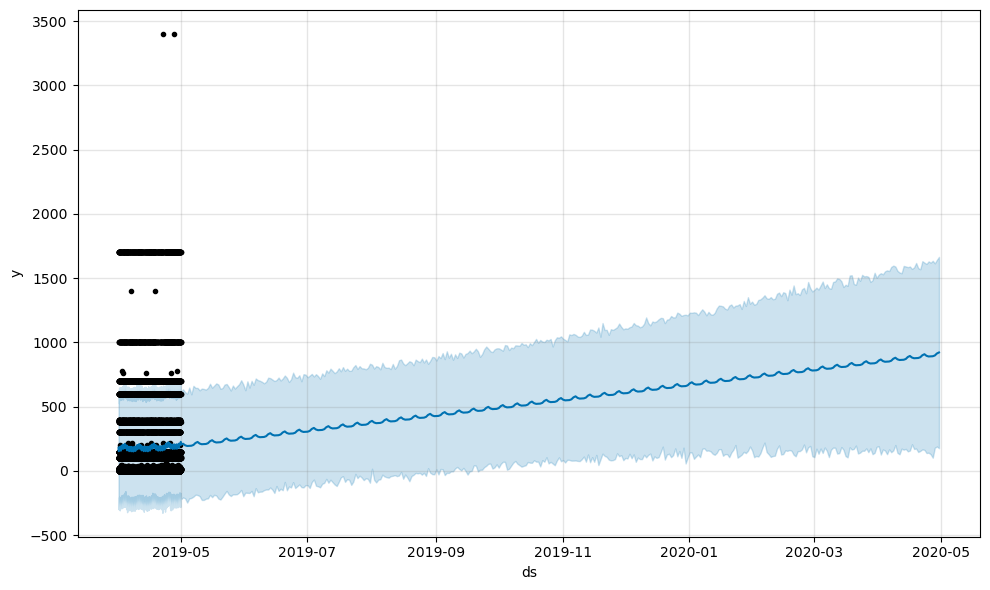

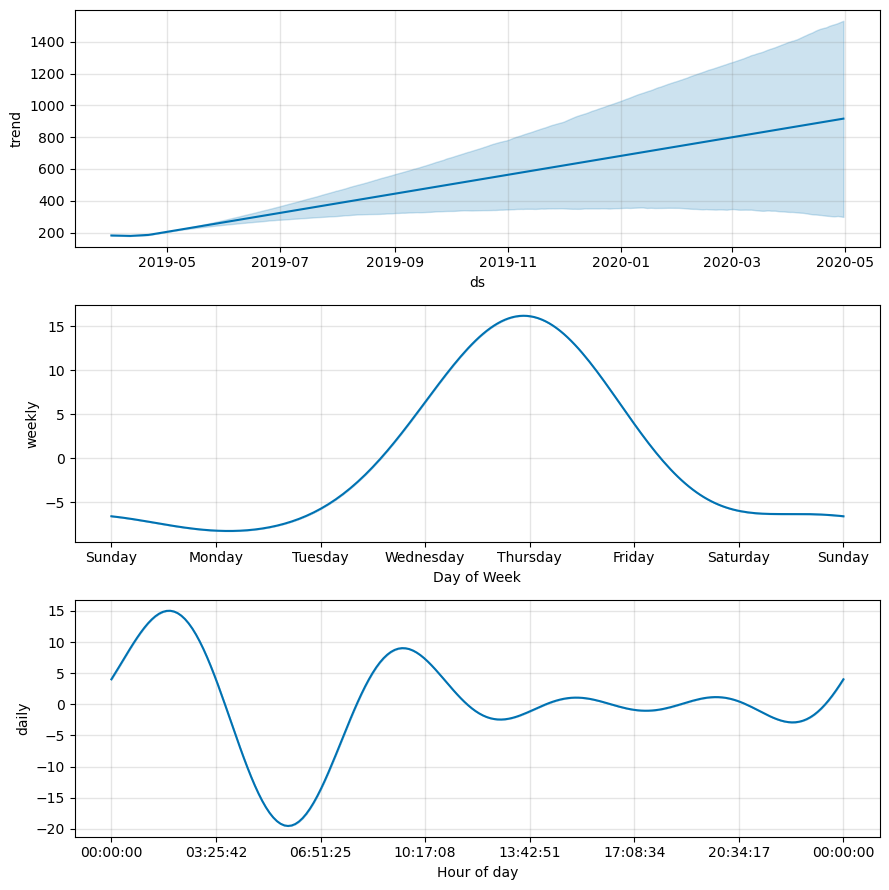

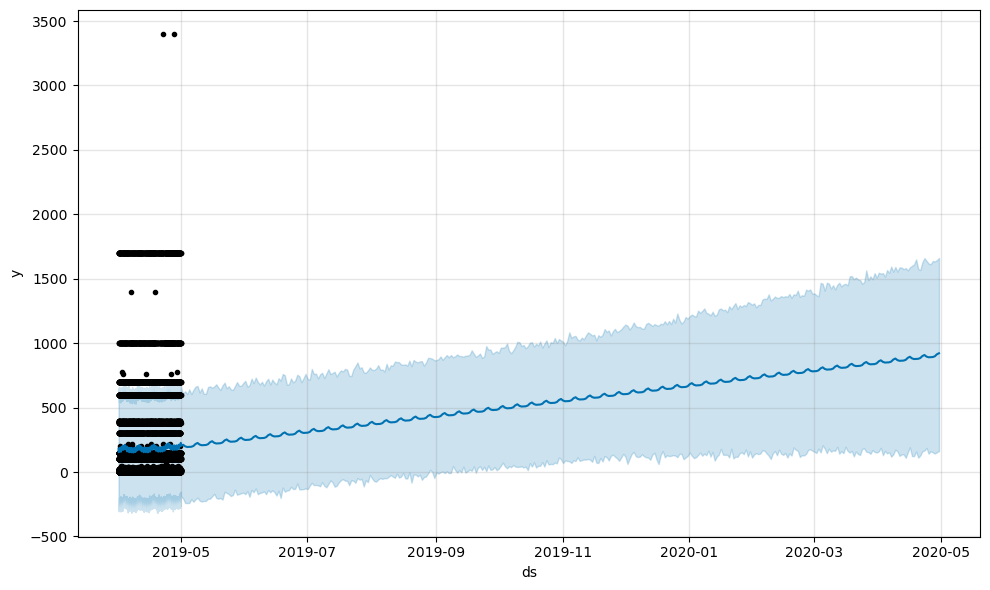

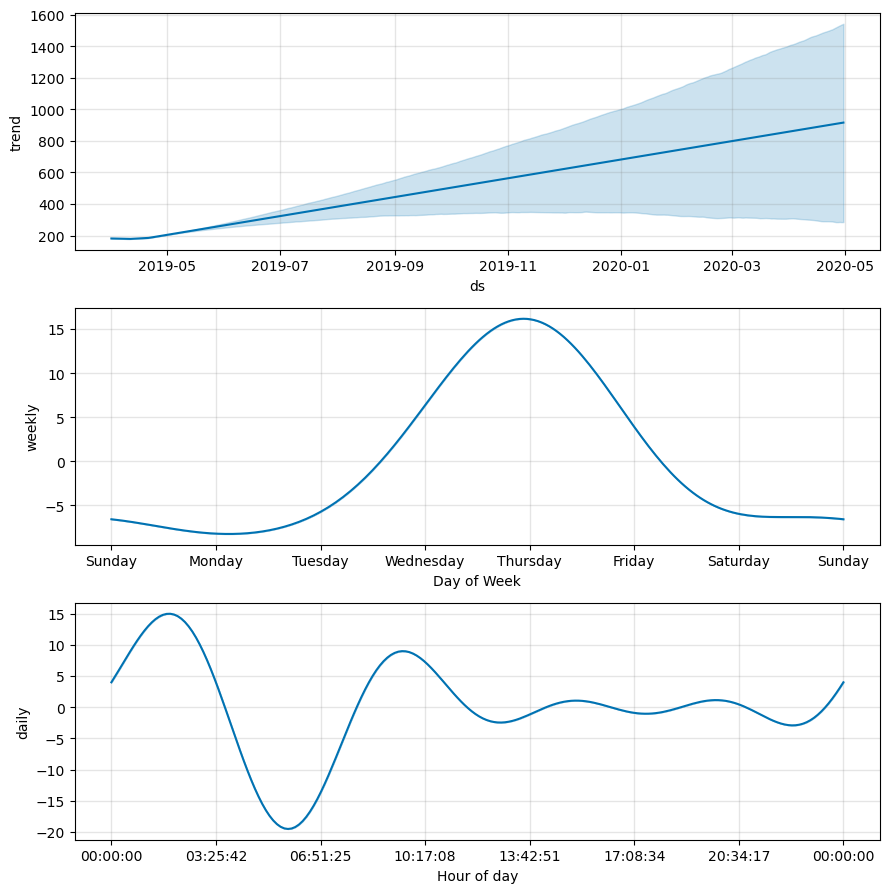

In [108]:
# Drop any rows with NaT in 'ds' column before predicting
future = future.dropna(subset=['ds'])

# Make predictions
forecast = model.predict(future)

# Plot forecast
model.plot(forecast)
plt.show()

# Optional: plot forecast components
model.plot_components(forecast)
plt.show()

In [110]:
forecast.to_csv("sales_forecast.csv", index=False)

In [113]:
# Step 1: Sort by date just in case
df = df.sort_values('ds')

# Step 2: Split
train = df[:-30]  # all except last 30
test = df[-30:]   # last 30 days

In [115]:
from prophet import Prophet

model = Prophet()
model.fit(train)

07:30:18 - cmdstanpy - INFO - Chain [1] start processing
07:30:20 - cmdstanpy - INFO - Chain [1] done processing


In [119]:
print(future.tail(10))  # To view the last few rows
print(future['ds'].isnull().sum())  # Check for NaNs in the 'ds' column

                       ds
13604 2019-05-22 04:25:00
13605 2019-05-23 04:25:00
13606 2019-05-24 04:25:00
13607 2019-05-25 04:25:00
13608 2019-05-26 04:25:00
13609 2019-05-27 04:25:00
13610 2019-05-28 04:25:00
13611 2019-05-29 04:25:00
13612 2019-05-30 04:25:00
13613 2019-05-31 04:25:00
1


In [121]:
future = model.make_future_dataframe(periods=30)
print(future.tail(10))  # Double-check that the dates are valid.

                       ds
13604 2019-05-22 04:25:00
13605 2019-05-23 04:25:00
13606 2019-05-24 04:25:00
13607 2019-05-25 04:25:00
13608 2019-05-26 04:25:00
13609 2019-05-27 04:25:00
13610 2019-05-28 04:25:00
13611 2019-05-29 04:25:00
13612 2019-05-30 04:25:00
13613 2019-05-31 04:25:00


In [128]:
print(future.isnull().sum())
future = future.dropna(subset=['ds'])
print(future.isnull().sum())

ds    1
dtype: int64
ds    0
dtype: int64


In [130]:
forecast = model.predict(future)

**Model Evaluation**

In [136]:
# Split data
train = df.iloc[:-30]
test = df.iloc[-30:]

In [138]:
from prophet import Prophet

model = Prophet()
model.fit(train)

10:45:36 - cmdstanpy - INFO - Chain [1] start processing
10:45:38 - cmdstanpy - INFO - Chain [1] done processing


In [140]:
future = model.make_future_dataframe(periods=30)

In [144]:
future.tail(10)
future['ds'].isna().sum()

1

In [152]:
# Drop the NaN row from the future dataframe
future = future.dropna(subset=['ds'])

In [156]:
# Also ensure the ds column has no timezone info
future['ds'] = future['ds'].dt.tz_localize(None)

In [158]:
forecast = model.predict(future)

In [160]:
# Merge the forecast with the original df on the 'ds' column
results = pd.merge(forecast[['ds', 'yhat']], df[['ds', 'y']], on='ds', how='inner')

# View the comparison
results.head()

,ds,yhat,y
0,2019-04-01 03:09:00,180.055762,14.95
1,2019-04-01 04:12:00,165.947524,11.99
2,2019-04-01 05:06:00,155.840357,149.99
3,2019-04-01 05:18:00,154.510707,11.95
4,2019-04-01 05:58:00,153.277527,109.99


In [162]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Actual and predicted values
y_true = results['y']
y_pred = results['yhat']

# Metrics
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')

MAE: 219.46
RMSE: 332.01


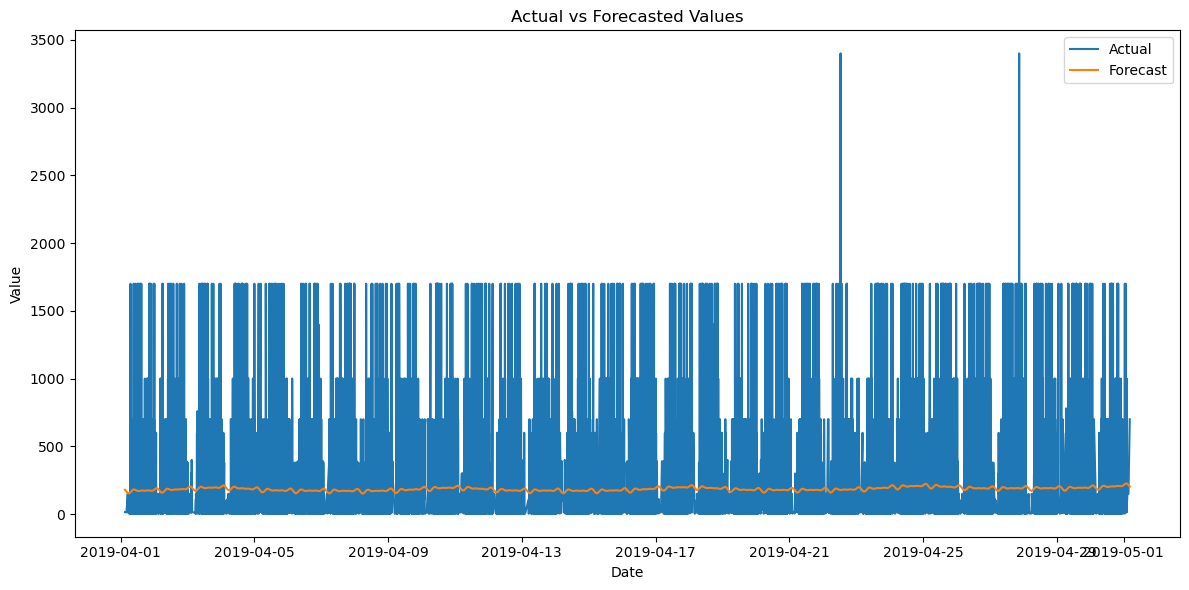

In [164]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(results['ds'], results['y'], label='Actual')
plt.plot(results['ds'], results['yhat'], label='Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Actual vs Forecasted Values')
plt.legend()
plt.tight_layout()
plt.show()

In [173]:
forecast = model.predict(future)
# Merge predictions with actuals on date
results = test[['ds', 'y']].merge(forecast[['ds', 'yhat']], on='ds', how='left')

In [179]:
forecast_test = forecast[forecast['ds'].isin(test['ds'])]
results = test[['ds', 'y']].merge(forecast_test[['ds', 'yhat']], on='ds', how='left')
results_clean = results.dropna(subset=['yhat'])

In [183]:
print(results.head())
print(results.shape)

   ds   y  yhat
0 NaT NaN   NaN
1 NaT NaN   NaN
2 NaT NaN   NaN
3 NaT NaN   NaN
4 NaT NaN   NaN
(30, 3)


In [185]:
print(results.isna().sum())

ds      30
y       30
yhat    30
dtype: int64


In [187]:
results_clean = results.dropna(subset=['y', 'yhat'])

print(results_clean.shape)  # Make sure it's not (0, )

(0, 3)


In [189]:
print(results_clean.head())

Empty DataFrame
Columns: [ds, y, yhat]
Index: []


In [195]:
# Merge original (actual) data with predicted data
merged = df.merge(forecast[['ds', 'yhat']], on='ds', how='inner')

# Check the merged data
print("Merged shape:", merged.shape)
print(merged[['ds', 'y', 'yhat']].head())

# Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

if not merged.empty:
    mae = mean_absolute_error(merged['y'], merged['yhat'])
    rmse = np.sqrt(mean_squared_error(merged['y'], merged['yhat']))
    mape = np.mean(np.abs((merged['y'] - merged['yhat']) / merged['y'])) * 100

    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAPE: {mape:.2f}%")
else:
    print("Merged dataframe is empty — check your date alignment.")

Merged shape: (18289, 3)
                   ds       y        yhat
0 2019-04-01 03:09:00   14.95  180.055762
1 2019-04-01 04:12:00   11.99  165.947524
2 2019-04-01 05:06:00  149.99  155.840357
3 2019-04-01 05:18:00   11.95  154.510707
4 2019-04-01 05:58:00  109.99  153.277527
MAE: 219.46
RMSE: 332.01
MAPE: 1448.71%
